Goals:

- Use PyTorch to define a simple statistical model.
- Use autograd functionality and stochastic gradient descent to optimize the model.


In [1]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [23]:
np.random.seed(42)
torch.manual_seed(142)
N = 20
x1 = np.ones(N)
x2 = np.random.normal(size=N)
X = np.column_stack((x1, x2))
print(X)
print(X.shape)
true_beta = np.random.normal(size = 2)
y = X @ true_beta + np.random.normal(size = N, loc = 0, scale = 0.2)
print(y)
print(y.shape)

[[ 1.          0.49671415]
 [ 1.         -0.1382643 ]
 [ 1.          0.64768854]
 [ 1.          1.52302986]
 [ 1.         -0.23415337]
 [ 1.         -0.23413696]
 [ 1.          1.57921282]
 [ 1.          0.76743473]
 [ 1.         -0.46947439]
 [ 1.          0.54256004]
 [ 1.         -0.46341769]
 [ 1.         -0.46572975]
 [ 1.          0.24196227]
 [ 1.         -1.91328024]
 [ 1.         -1.72491783]
 [ 1.         -0.56228753]
 [ 1.         -1.01283112]
 [ 1.          0.31424733]
 [ 1.         -0.90802408]
 [ 1.         -1.4123037 ]]
(20, 2)
[1.36700813 1.21191593 1.2105395  1.14396924 1.28831634 1.59365095
 0.9889722  1.23404144 1.45130364 1.71360721 1.56757806 1.35925732
 1.5755284  1.65345337 1.89686705 1.20066594 1.42868482 1.43407142
 1.8183524  1.81878713]
(20,)


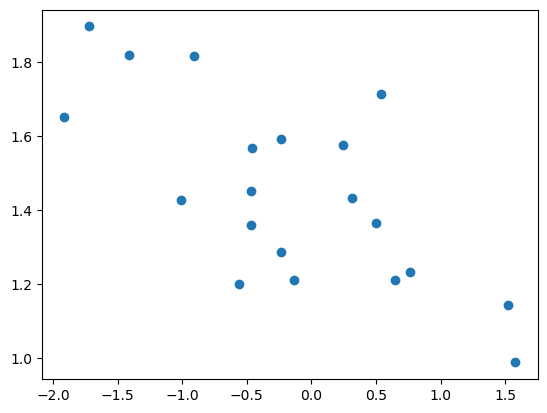

In [24]:
plt.scatter(x2, y)

In [39]:
y_torch = torch.tensor(y)
X_torch = torch.tensor(X)
beta = torch.tensor(np.random.normal(size = 2), requires_grad = True)

In [40]:
# Minimize mean squared error.
def mse_loss(beta):
  loss = torch.mean((y_torch - X_torch @ beta)**2)
  return loss

In [41]:
# Define the optimizer
optimizer = optim.Adam([beta], lr=0.01)

# Optimization loop
losses = []
for i in range(1000):
  optimizer.zero_grad()  # Zero the gradients
  #loss = torch.mean((y_torch - X_torch @ theta)**2) # Calculate the loss
  loss = mse_loss(beta)
  losses.append(loss.item())
  loss.backward()       # Compute gradients
  optimizer.step()      # Update theta
  if i % 100 == 0:
      print(loss)



tensor(2.8567, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.4931, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0697, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0319, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [42]:
# Compute the closed form solution.
X_transpose = X_torch.T
beta_closed_form = torch.linalg.solve(X_transpose @ X_torch, X_transpose @ y_torch)
#torch.linalg.inv(X_transpose @ X_torch) @ (X_transpose @ y_torch)

In [43]:
print(f"True beta: {true_beta}")
print("Optimized beta:", beta.data.numpy())
print("Closed-form solution for theta:", beta_closed_form)


True beta: [ 1.46564877 -0.2257763 ]
Optimized beta: [ 1.41628566 -0.18413969]
Closed-form solution for theta: tensor([ 1.4163, -0.1841], dtype=torch.float64)


Loss: tensor(0.0305, dtype=torch.float64, grad_fn=<MeanBackward0>)


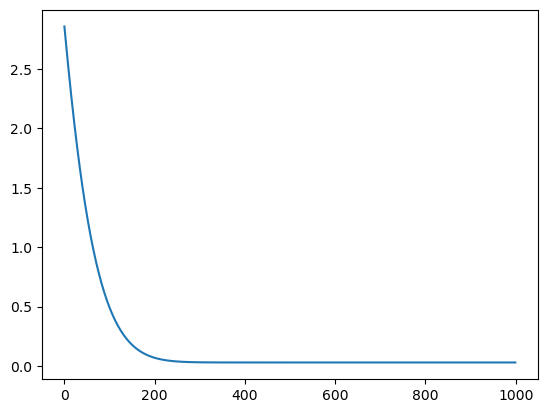

In [44]:
print("Loss:", loss)
plt.plot(losses)

Let's fit a logistic regression model: $Y \sim \text{Bernoulli}(\theta)$.

Recall that the expectation of $Y$ is $\theta$ and we model $\theta$ using a logit function, leading to logistic regression:

$$\log \frac{\theta}{1-\theta} = X \beta \Rightarrow \theta = \frac{\exp(X\beta)}{1 + \exp(X\beta)}.$$


In [45]:
np.random.seed(142)
torch.manual_seed(42)
N = 100
x1 = np.ones(N)
x2 = np.random.normal(size=N)
X = np.column_stack((x1, x2))
print(X.shape)

true_beta = np.random.normal(size = 2)
theta = np.exp(X@true_beta) / (1 + np.exp(X@true_beta))
y = np.random.binomial(n=1, p=theta)
y

(100, 2)


array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [46]:
y_torch = torch.tensor(y)
X_torch = torch.tensor(X)


In [47]:
# Define a suitable loss function.
def mse_loss_coin_flip(beta):
  theta = torch.exp(X_torch @ beta) / (1 + torch.exp(X_torch @ beta))
  loss = torch.mean((y_torch - theta)**2)
  return loss

In [57]:
beta_hat = torch.tensor(np.random.normal(size = 2), requires_grad = True)
optimizer = optim.SGD([beta_hat], lr=0.01)

losses = []
for i in range(8000):
  optimizer.zero_grad()
  loss = mse_loss_coin_flip(beta_hat)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()



In [58]:
print(f"True beta: {true_beta}")
print("Optimized beta_hat:", beta_hat)
print("Loss:", loss)

True beta: [-0.70139654  2.00806849]
Optimized beta_hat: tensor([-0.9592,  1.7069], dtype=torch.float64, requires_grad=True)
Loss: tensor(0.1540, dtype=torch.float64, grad_fn=<MeanBackward0>)


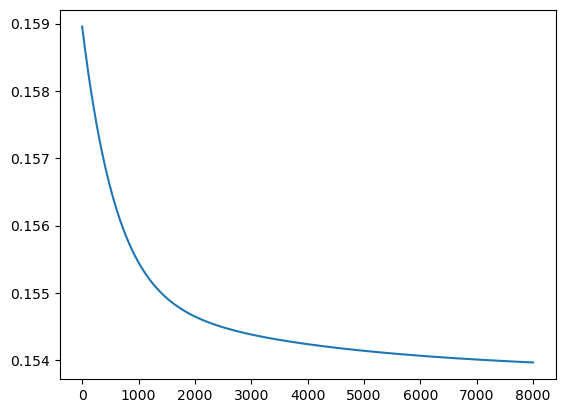

In [59]:
plt.plot(losses)

Check $\theta$.

In [71]:
beta_hat_numpy = beta_hat.data.numpy()
theta_hat = np.exp(X@beta_hat_numpy) / (1 + np.exp(X@beta_hat_numpy))
np.mean((theta_hat - theta)**2)

0.0048231080627030316

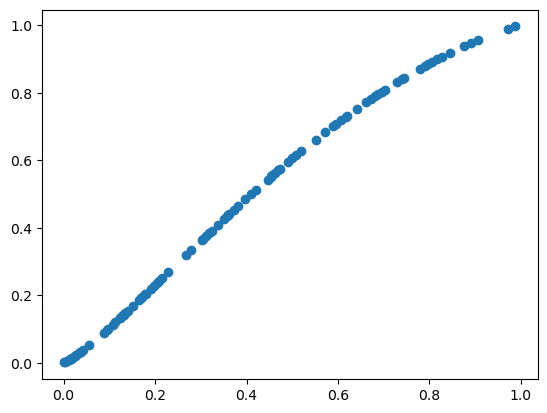

In [72]:
plt.scatter(theta_hat, theta)


In [68]:
def coin_flip_log_likelihood(beta):
  theta = torch.exp(X_torch @ beta) / (1 + torch.exp(X_torch @ beta))
  log_likelihood = torch.sum(y_torch * torch.log(theta) + (1 - y_torch) * torch.log(1 - theta))
  return -log_likelihood

In [69]:
beta_hat2 = torch.tensor(np.random.normal(size = 2), requires_grad = True)
optimizer = optim.SGD([beta_hat2], lr=0.001)

losses2 = []
for i in range(1000):
  optimizer.zero_grad()
  loss = coin_flip_log_likelihood(beta_hat2)
  losses2.append(loss.item())
  loss.backward()
  optimizer.step()



In [70]:
print(f"True beta: {true_beta}")
print("Optimized beta_hat:", beta_hat2)
print("Loss:", loss)

True beta: [-0.70139654  2.00806849]
Optimized beta_hat: tensor([-0.9029,  1.7245], dtype=torch.float64, requires_grad=True)
Loss: tensor(46.9081, dtype=torch.float64, grad_fn=<NegBackward0>)


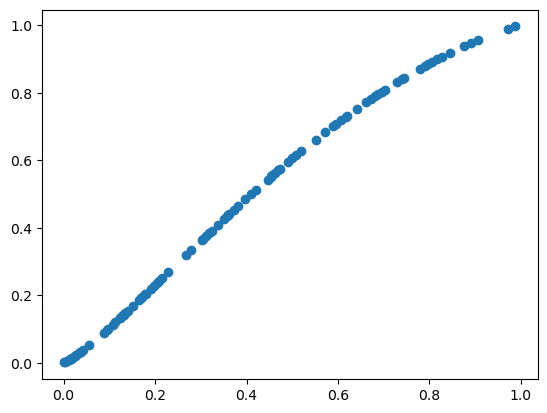

In [73]:
theta_hat2 = np.exp(X@beta_hat2.data.numpy()) / (1 + np.exp(X@beta_hat2.data.numpy()))
plt.scatter(theta_hat, theta)


In [74]:
np.mean((theta_hat2 - theta)**2)

0.0034017705203849007